<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#The-Reuters-dataset" data-toc-modified-id="The-Reuters-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Reuters dataset</a></span></li><li><span><a href="#Decoding-newswires-back-to-text" data-toc-modified-id="Decoding-newswires-back-to-text-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decoding newswires back to text</a></span></li><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparing the data</a></span><ul class="toc-item"><li><span><a href="#Encoding-the-data" data-toc-modified-id="Encoding-the-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Encoding the data</a></span></li></ul></li><li><span><a href="#Building-the-network" data-toc-modified-id="Building-the-network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Building the network</a></span><ul class="toc-item"><li><span><a href="#Model-definition" data-toc-modified-id="Model-definition-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model definition</a></span></li><li><span><a href="#Compiling-the-model" data-toc-modified-id="Compiling-the-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Compiling the model</a></span></li></ul></li><li><span><a href="#Validating-our-approach" data-toc-modified-id="Validating-our-approach-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Validating our approach</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Plotting-the-history" data-toc-modified-id="Plotting-the-history-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plotting the history</a></span></li><li><span><a href="#Retraining-the-model-from-scratch" data-toc-modified-id="Retraining-the-model-from-scratch-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Retraining the model from scratch</a></span></li><li><span><a href="#Generating-predictions-on-new-data" data-toc-modified-id="Generating-predictions-on-new-data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Generating predictions on new data</a></span></li><li><span><a href="#A-different-way-to-handle-the-labels-and-the-loss" data-toc-modified-id="A-different-way-to-handle-the-labels-and-the-loss-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>A different way to handle the labels and the loss</a></span></li><li><span><a href="#The-importance-of-having-sufficient-large-intermediate-layers" data-toc-modified-id="The-importance-of-having-sufficient-large-intermediate-layers-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>The importance of having sufficient large intermediate layers</a></span></li><li><span><a href="#Further-Experiments" data-toc-modified-id="Further-Experiments-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Further Experiments</a></span><ul class="toc-item"><li><span><a href="#Using-larger-layers" data-toc-modified-id="Using-larger-layers-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Using larger layers</a></span></li><li><span><a href="#Smaller-layers" data-toc-modified-id="Smaller-layers-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Smaller layers</a></span></li></ul></li><li><span><a href="#A-single-hidden-layer" data-toc-modified-id="A-single-hidden-layer-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>A single hidden layer</a></span><ul class="toc-item"><li><span><a href="#Three-hidden-layers" data-toc-modified-id="Three-hidden-layers-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Three hidden layers</a></span></li></ul></li><li><span><a href="#Key-Takeaways" data-toc-modified-id="Key-Takeaways-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Key Takeaways</a></span></li></ul></div>

# Goal

In this notebook, we will build a network to classify Reuters newswires into 46 mutually exclusive topics. This is an instance of **multi-class classification**; and because each data point should be classified into only one category, the problem is more specifically an instance of **single-label**, **multi-class classification**.

If each data point could belong to multiple categories (in this case, topics), you would be facing a **multi-label, multi-class classification** problem. 

# The Reuters dataset

- The **Reuters dataset**, a set of short newswires and their topics, published by Reuters in 1986.

- It is a simple, widely used toy dataset for text classification.

- There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set. 

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 7s 3us/step


The argument num_words=10000 means you will only keep the top 10,000 most frequently occuring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [6]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


# Decoding newswires back to text

In [7]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 2s 3us/step


- word_index is a dictionary mapping words to an integer index

In [8]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

- Reverses it, mapping integer indices to words.

In [10]:
decoded_newswire = ' '.join(
    [reverse_word_index.get( i - 3, '?') for i in train_data[0]])

In [11]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

- Decodes the newswire. Note that the indices are offset by 3 because 0, 1, and 2 are reversed indices for padding, start of sequence, and unknown.

- The label associated with an example is an integer between 0 and 45--a topic index:

In [12]:
train_labels[10]

3

# Preparing the data

## Encoding the data

In [13]:
import numpy as np

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Sets specific indices of results[i] to 1s
    return results

In [15]:
x_train = vectorize_sequences(train_data)  # vectorized training data
x_test  = vectorize_sequences(test_data)   # vectorized testing data

- To vectorize the labels, we will one-hot encod the labels by embedding each label as an all-zero vector with 1 in the place of the label index.

In [16]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        
    return results

In [17]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Building the network

- This topic-classification problem looks similar to the [movie-review](https://github.com/andersy005/deep-learning/blob/master/02-A-Binary-Classification-Example.ipynb) classification problem: in both cases, you are trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger. 

- In a stack of **Dense** layers like that you've been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. 

- In the movie review example, we used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

- For this reason you will use larger layers. We will go with 64 units.

## Model definition

In [18]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two other things we should note about this architecture:
 - We should the network with a **Dense** layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
 
 - The last layer uses a **softmax** activation. It means the network will output a **probability distribution** over the 46 different output classes--for every input sample, the network will produce a 46-dimensional output vector, where ```output[i]``` is the probability that the sample belongs to ```class[i]```. The 46 scores will sum to 1.
 
 
The best loss function to use in this case is **```categorical_crossentropy```**. It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, we train the network to output something as close as possible to the true labels.

## Compiling the model

In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Validating our approach

Let's set apart 1,000 samples in the training data to use as a validation set.

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [22]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model

In [23]:
%%time 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 9s 1ms/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 107us/step - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 107us/step - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch

# Plotting the history 

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [27]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.plot(epochs, acc_values, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

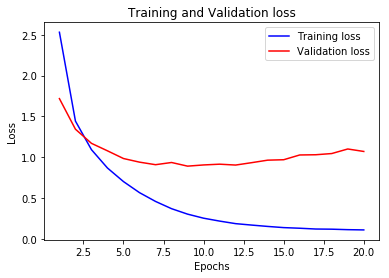

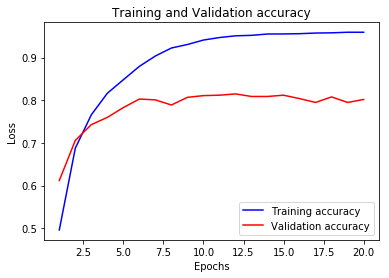

In [28]:
plot_history(history)

- The network begins to over-fit after nine epochs. Let's train a new network from scratch for nine epochs and then evaluate it on the test set.

# Retraining the model from scratch

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
%%time 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 10,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 97us/step - loss: 0.2311 - acc: 0.9464 - val_loss: 0.9516 - val_acc: 0.8050
Epoch 2/10
7982/7982 [==============================] - 1s 99us/step - loss: 0.2027 - acc: 0.9478 - val_loss: 0.8984 - val_acc: 0.8210
Epoch 3/10
7982/7982 [==============================] - 1s 102us/step - loss: 0.1769 - acc: 0.9535 - val_loss: 0.9316 - val_acc: 0.8270
Epoch 4/10
7982/7982 [==============================] - 1s 107us/step - loss: 0.1632 - acc: 0.9534 - val_loss: 0.9390 - val_acc: 0.8100
Epoch 5/10
7982/7982 [==============================] - 1s 101us/step - loss: 0.1477 - acc: 0.9539 - val_loss: 0.9796 - val_acc: 0.8070
Epoch 6/10
7982/7982 [==============================] - 1s 98us/step - loss: 0.1386 - acc: 0.9574 - val_loss: 1.0245 - val_acc: 0.8070
Epoch 7/10
7982/7982 [==============================] - 1s 111us/step - loss: 0.1259 - acc: 0.9579 - val_loss: 1.0653 - val_acc: 0.7930
Epo

In [34]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 161us/step


In [35]:
results

[1.217366324294813, 0.78673196796954792]

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case it's closer to:

In [37]:
import copy

In [38]:
test_labels_copy = copy.copy(test_labels)

In [39]:
np.random.shuffle(test_labels_copy)

In [40]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [41]:
float(np.sum(hits_array)) / len(test_labels)

0.17809439002671415

So, the results seem pretty good, at least when compared to a random baseline.

# Generating predictions on new data

In [42]:
predictions = model.predict(x_test)

In [44]:
predictions[0].shape

(46,)

In [47]:
print(predictions[0])

[  1.05324750e-06   2.77986442e-06   2.68680355e-06   7.40101039e-01
   2.48536274e-01   2.73510686e-10   2.07514063e-07   1.71533738e-05
   8.96962918e-03   4.20125247e-07   1.06829284e-05   5.12550294e-04
   2.17220531e-06   4.97378733e-06   1.27273111e-07   8.54793072e-08
   3.73038711e-05   8.30939734e-06   1.37933939e-05   2.71465105e-04
   9.37520585e-04   3.30147013e-04   9.83379635e-08   7.92814990e-06
   1.31494645e-07   6.25226767e-06   4.41695081e-09   6.50866525e-07
   3.11909105e-07   2.28258541e-05   1.26772880e-04   3.37000643e-06
   1.05909965e-06   3.89602405e-07   8.43572161e-06   4.69128327e-06
   7.10990616e-06   1.24180388e-05   7.47526065e-06   5.72334238e-06
   4.54097375e-07   2.00320010e-05   8.75890915e-09   1.35273729e-06
   1.58273057e-08   2.16158742e-06]


In [48]:
print(max(predictions[0]))

0.740101


In [49]:
print(min(predictions[0]))

2.73511e-10


In [51]:
np.sum(predictions[0])

1.0

In [52]:
np.argmax(predictions[0])

3

# A different way to handle the labels and the loss

The other way to encode the labels would be to cast them as an integer tensor:

```python
y_train = np.array(train_labels)
y_test = np.array(test_labels)
```

The only thing this approach would change is the choice of the loss function. The loss function ```categorical_crossentropy```, expects the labels to follow a categorical encoding. With integer labels, we should use ```sparse_categorical_crossentropy```:

```python
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

# The importance of having sufficient large intermediate layers

We should avoid intermediate layers with many fewer than 46 hidden units. Let's see what happens when you introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional:

In [53]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
%%time 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 200us/step - loss: 2.6802 - acc: 0.4543 - val_loss: 1.9993 - val_acc: 0.5750
Epoch 2/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.6919 - acc: 0.6189 - val_loss: 1.5595 - val_acc: 0.6390
Epoch 3/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.3341 - acc: 0.6885 - val_loss: 1.3959 - val_acc: 0.7030
Epoch 4/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.1463 - acc: 0.7273 - val_loss: 1.3345 - val_acc: 0.7080
Epoch 5/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.0265 - acc: 0.7464 - val_loss: 1.3213 - val_acc: 0.7120
Epoch 6/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.9340 - acc: 0.7625 - val_loss: 1.3112 - val_acc: 0.7240
Epoch 7/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.8583 - acc: 0.7810 - val_loss: 1.3155 - val_acc: 0.7220


The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is mostly due to the fact that we are trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. This network is able to cram **most** of the necessary information into these eight-dimensional representations, but not all of it.

# Further Experiments

## Using larger layers

In [55]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 253us/step - loss: 1.5563 - acc: 0.6664 - val_loss: 1.0756 - val_acc: 0.7510
Epoch 2/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.7588 - acc: 0.8343 - val_loss: 0.9218 - val_acc: 0.7970
Epoch 3/9
7982/7982 [==============================] - 2s 239us/step - loss: 0.4528 - acc: 0.8999 - val_loss: 0.8350 - val_acc: 0.8200
Epoch 4/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.2972 - acc: 0.9340 - val_loss: 0.9507 - val_acc: 0.7900
Epoch 5/9
7982/7982 [==============================] - 2s 204us/step - loss: 0.2292 - acc: 0.9440 - val_loss: 0.8919 - val_acc: 0.8280
Epoch 6/9
7982/7982 [==============================] - 2s 217us/step - loss: 0.1911 - acc: 0.9521 - val_loss: 0.9485 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 2s 206us/step - loss: 0.1679 - acc: 0.9500 - val_loss: 0.9803 - val_acc: 0.8080
Epoch 8

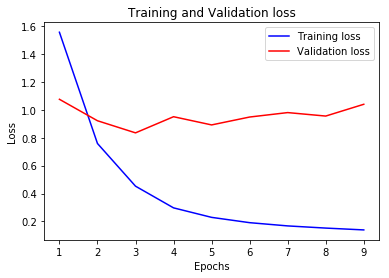

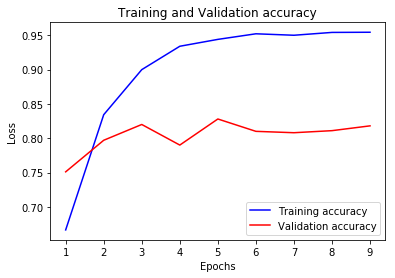

In [56]:
plot_history(history)

## Smaller layers

In [57]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 174us/step - loss: 2.3654 - acc: 0.5470 - val_loss: 1.5079 - val_acc: 0.6660
Epoch 2/9
7982/7982 [==============================] - 1s 147us/step - loss: 1.2353 - acc: 0.7338 - val_loss: 1.1723 - val_acc: 0.7430
Epoch 3/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.9138 - acc: 0.8026 - val_loss: 1.0299 - val_acc: 0.7730
Epoch 4/9
7982/7982 [==============================] - 1s 150us/step - loss: 0.7048 - acc: 0.8469 - val_loss: 0.9725 - val_acc: 0.7990
Epoch 5/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.5478 - acc: 0.8822 - val_loss: 0.9317 - val_acc: 0.8100
Epoch 6/9
7982/7982 [==============================] - 1s 142us/step - loss: 0.4307 - acc: 0.9069 - val_loss: 0.9137 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.3443 - acc: 0.9236 - val_loss: 0.9191 - val_acc: 0.8200
Epoch 8

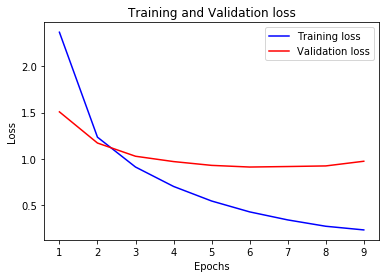

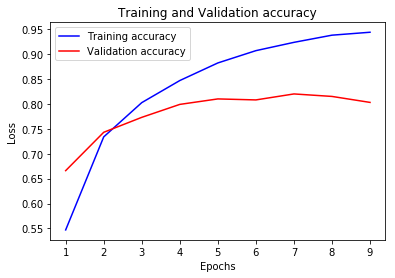

In [58]:
plot_history(history)

# A single hidden layer

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 244us/step - loss: 1.6128 - acc: 0.6770 - val_loss: 1.0957 - val_acc: 0.7630
Epoch 2/9
7982/7982 [==============================] - 2s 224us/step - loss: 0.7517 - acc: 0.8439 - val_loss: 0.8639 - val_acc: 0.8270
Epoch 3/9
7982/7982 [==============================] - 2s 229us/step - loss: 0.4650 - acc: 0.9037 - val_loss: 0.8105 - val_acc: 0.8370
Epoch 4/9
7982/7982 [==============================] - 2s 225us/step - loss: 0.3143 - acc: 0.9313 - val_loss: 0.8014 - val_acc: 0.8370
Epoch 5/9
7982/7982 [==============================] - 2s 223us/step - loss: 0.2358 - acc: 0.9446 - val_loss: 0.8449 - val_acc: 0.8230
Epoch 6/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.1931 - acc: 0.9496 - val_loss: 0.8672 - val_acc: 0.8230
Epoch 7/9
7982/7982 [==============================] - 2s 227us/step - loss: 0.1661 - acc: 0.9534 - val_loss: 0.9013 - val_acc: 0.8160
Epoch 8

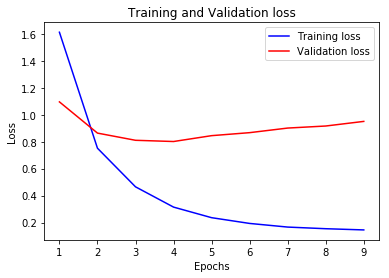

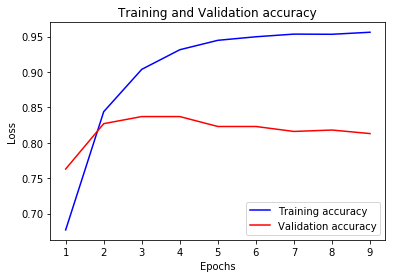

In [59]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 128,
                    validation_data = (x_val, y_val))
plot_history(history)

## Three hidden layers

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 260us/step - loss: 1.6011 - acc: 0.6423 - val_loss: 1.1304 - val_acc: 0.7460
Epoch 2/9
7982/7982 [==============================] - 2s 231us/step - loss: 0.8166 - acc: 0.8162 - val_loss: 1.0151 - val_acc: 0.7680
Epoch 3/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.4978 - acc: 0.8857 - val_loss: 0.9137 - val_acc: 0.8070
Epoch 4/9
7982/7982 [==============================] - 2s 237us/step - loss: 0.3194 - acc: 0.9303 - val_loss: 0.9449 - val_acc: 0.8090
Epoch 5/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.2332 - acc: 0.9454 - val_loss: 0.9793 - val_acc: 0.8050
Epoch 6/9
7982/7982 [==============================] - 2s 234us/step - loss: 0.1937 - acc: 0.9508 - val_loss: 1.0254 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 2s 241us/step - loss: 0.1680 - acc: 0.9528 - val_loss: 1.0180 - val_acc: 0.7960
Epoch 8

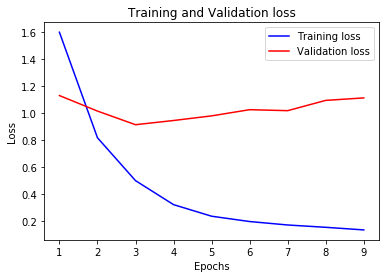

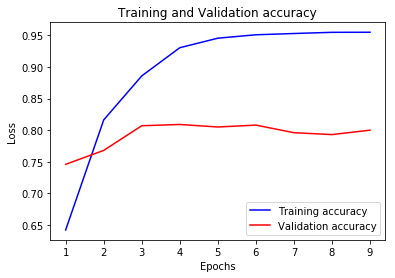

In [60]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 9,
                    batch_size = 128,
                    validation_data = (x_val, y_val))
plot_history(history)

# Key Takeaways

- If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
- In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
- There are two ways to handle labels in multiclass classification:
   - Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
   - Encoding the labels as integers and using the sparse_categorical_-crossentropy loss function
- If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.

In [61]:
%load_ext version_information
%version_information keras, numpy, matplotlib

Software versions
Python 3.6.3 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
keras 2.0.9
numpy 1.12.1
matplotlib 2.0.0
Sun Dec 17 18:16:20 2017 CST